# Part 1, exploratory data analysis (EDA)

Вопросы:

Ссылка на описание датасета - https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

1. [2 балла] Загрузка данных и предобработка - загрузите датасет, указав, что header=None, так как первая строка не является строкой с названиями столбцов. Посмотрите на его `head` и `tail`. Похоже, названия столбцов нам все-таки понадобяться, чтобы  адекватно работать с датасетом, поэтому придется немного поработать руками :) Воспользуйтесь ссылкой выше, чтобы перейти к описанию датасета. там перечислены названия всех столюцов, а также описание закодированных значений. Вам нужно сотавить список (list), где будут через запятую перечислены строки-названия столбцов, что-то вроде `columns = ['ID', 'Age', ...]` а затем переименовать столбцы загруженного датасета. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Кто больше употребляет алкоголь, мужчины или женщины? 
3. [1 балл] Какую долю датасета составляют белые мужчины из США с докторской степенью? 
4. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета.
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [2 балла] Визуализация - по аналогии с семинарским занятием, постройте на одном графике гистограммы распределения возрастов для мужчин и женщин. Задайте число разбиений `bins` равным 25, прозрачность графиков `alpha` = 0.6, не забудьте отнормировать значенияи и добавить подписи к графикам. Чтобы график лучше читался, первой строкой можно задать размер при помощи `plt.figure` равный (15, 10)
7. [2 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 10 баллов, отлично!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, данные загружены, столбцы названы!

In [5]:
data = pd.read_csv('Zaynutdinova_Rezeda_drug_consumption_data.txt',header=None)


In [6]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [7]:
data.tail(4)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [8]:
data.columns = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore(Neuroticism)','Escore(Extraversion)','Oscore(Openness)','Ascore(Agreeableness)','Cscore(Conscientiousness)','Impulsiveness','Sensation seeing','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
data.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


In [9]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),Cscore(Conscientiousness),Impulsiveness,Sensation seeing
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


2.Кто больше употребляет алкоголь, мужчины или женщины?

Для ответа на данный вопрос я применила метод выбора с условием. Таким образом я составила две таблицы, отображающих всех женщин(0.48246), которые никогда не употребляли алкоголь(CL0), и всех мужчин(-0.48246), которые никогда не употребляли алкоголь, а затем подсчитала количество строк в каждой из них. Конечное значение будет являться количеством женщин и мужчин, неупотреблявших алкоголь. Количество мужчин, никогда не употреблявших алкоголь, равно 19 и превышает количество женщин, никогда не употреблявших алкоголь, которое равно 15, из этого можно сделать вывод, что больше употребляют алкоголь женщины, так как большее число женщин хоть раз пробовали алкоголь.

### Комментарий к решению
Возможно, имело смысл посчитать процент мужчин/женщин, употребляющих алкоголь, вдруг у нас в выборке их разное число :) 

In [10]:
len(data.loc[(data['Gender'] > 0.48246) & (data['Alcohol'] == 'CL0')])

15

In [11]:
len(data.loc[(data['Gender'] < -0.48246) & (data['Alcohol'] == 'CL0')])

19

Ответ: больше алкоголь употребляют женщины

3.Какую долю датасета составляют белые мужчины из США с докторской степенью?

Чтобы дать ответ на этот вопрос, проделаем ту же процедуру, что и для ответа на предыдущий вопрос(2), а затем количество получившихся строк поделим на общее количество строк.

(5/1885)*100% = 0.265%

### Комментарий к решению
Отлично, всё верно!

In [12]:
data.loc[(data['Ethnicity'] == -0.31685) & (data['Gender'] < -0.48246) & (data['Country'] == -0.57009) & (data['Education'] == 1.98437)]

,ID,Age,Gender,Education,Country,Ethnicity,Nscore(Neuroticism),Escore(Extraversion),Oscore(Openness),Ascore(Agreeableness),...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1024,1028,1.09449,-0.48246,1.98437,-0.57009,-0.31685,0.13606,0.32197,0.44585,-0.91699,...,CL2,CL2,CL0,CL0,CL2,CL2,CL2,CL0,CL0,CL2
1110,1114,1.09449,-0.48246,1.98437,-0.57009,-0.31685,0.41667,-0.43999,0.58331,0.28783,...,CL1,CL0,CL0,CL0,CL3,CL3,CL2,CL2,CL0,CL0
1221,1225,-0.07854,-0.48246,1.98437,-0.57009,-0.31685,-0.46725,-2.32338,-2.21069,-0.15487,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1514,1518,1.09449,-0.48246,1.98437,-0.57009,-0.31685,0.62967,-1.37639,1.43533,-0.91699,...,CL1,CL0,CL0,CL0,CL1,CL2,CL1,CL5,CL0,CL0
1798,1802,-0.07854,-0.48246,1.98437,-0.57009,-0.31685,0.52135,1.58487,2.90161,1.28610,...,CL3,CL0,CL0,CL2,CL3,CL3,CL0,CL6,CL0,CL0


Ответ: доля белых мужчин из США с докторской степенью в данном датасете составляет 0.265% 

4.Визуализация - При помощи heatmap постройте тепловую карту корреляций для всего датасета.

### Комментарий к решению
И снова всё отлично

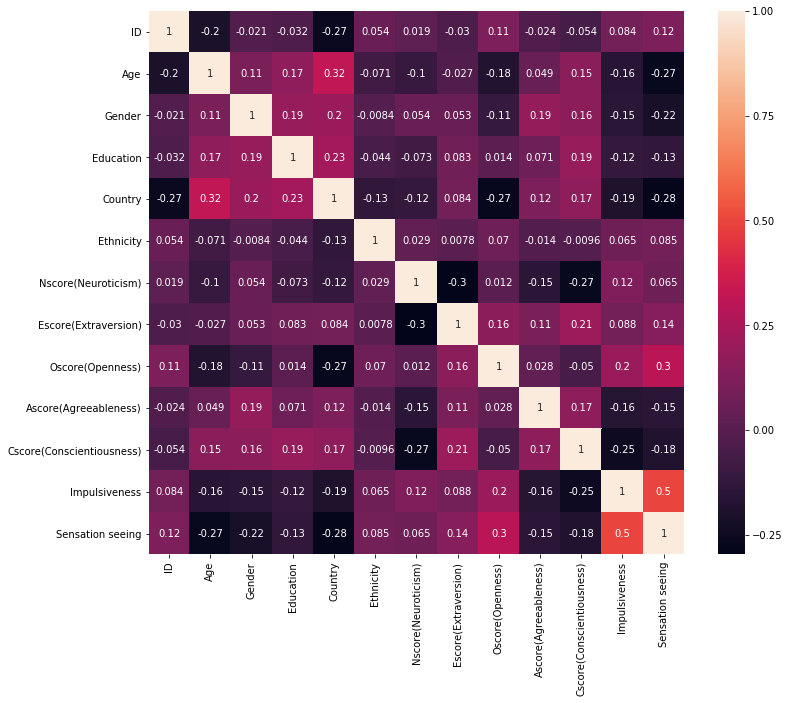

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr('kendall'), annot=True)

Здесь можно заметить, что наибольшая прямая зависимость (0,5) прослеживается между такими параметрами, как sensation seeing и impulsivness. Также относительно высокая отрицательная зависимость наблюдается между extraversion и neuroticism.

5.Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика figsize равным (25, 20).

### Комментарий к решению
Всё верно

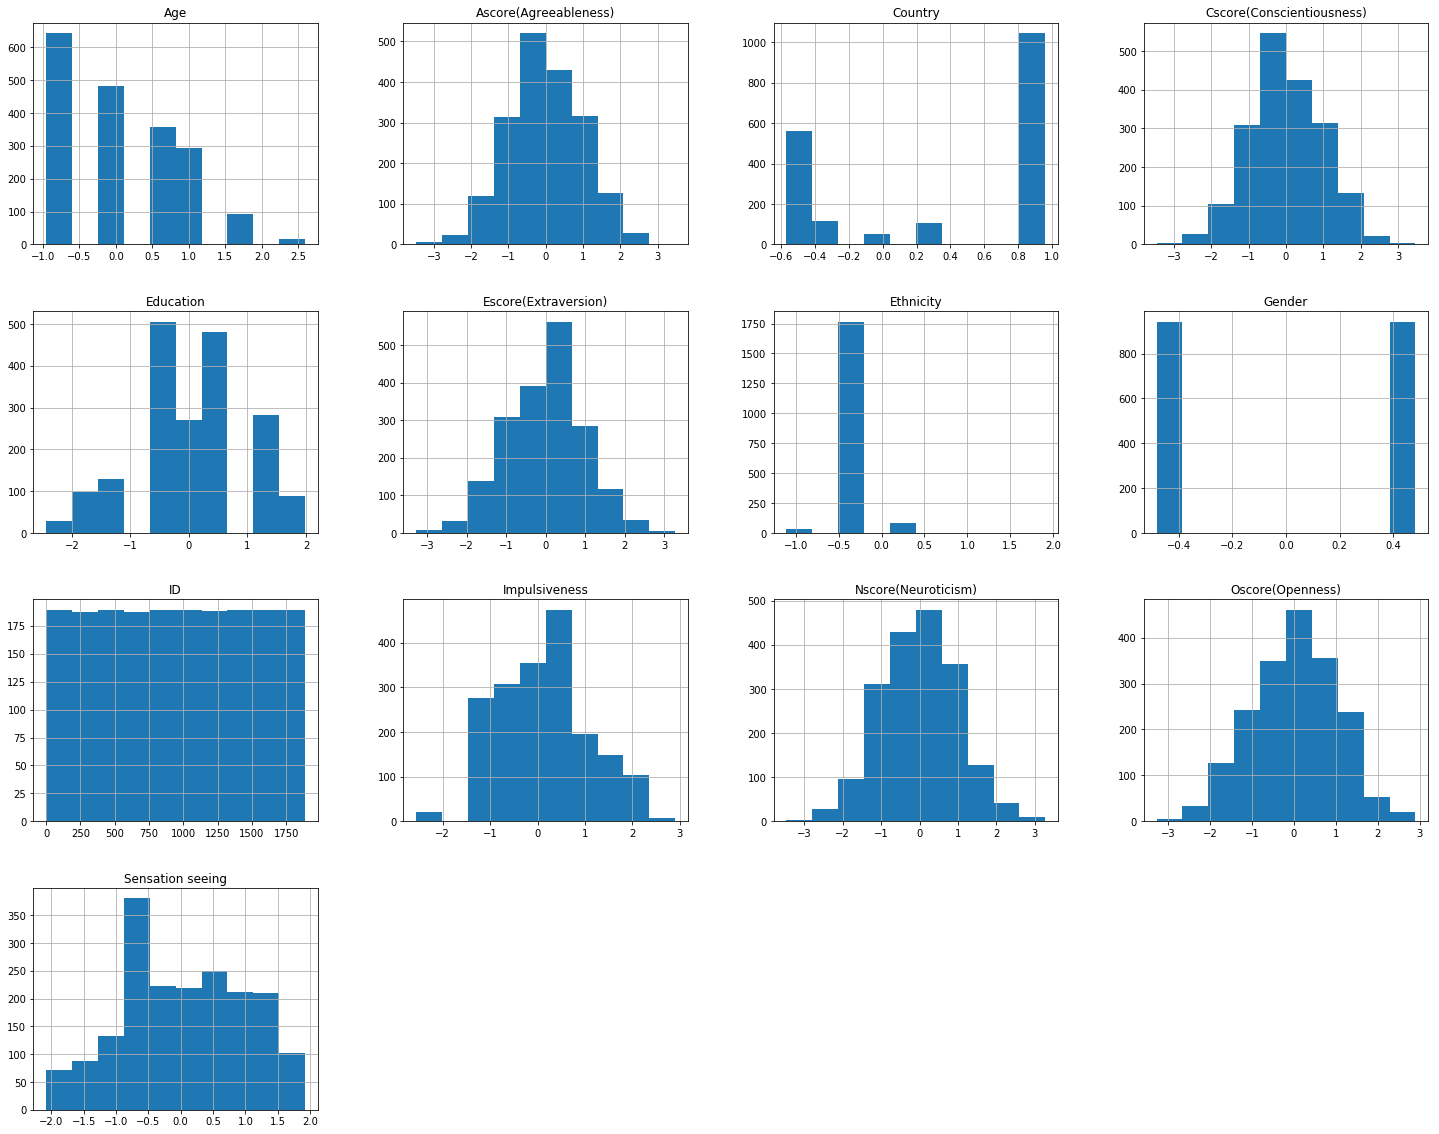

In [14]:
data.hist(figsize=(25, 20));

6.Визуализация - по аналогии с семинарским занятием, постройте на одном графике гистограммы распределения возрастов для мужчин и женщин. Задайте число разбиений bins равным 25, прозрачность графиков alpha = 0.6, не забудьте отнормировать значенияи и добавить подписи к графикам. Чтобы график лучше читался, первой строкой можно задать размер при помощи plt.figure равный (15, 10)

### Комментарий к решению
Прекрасно!

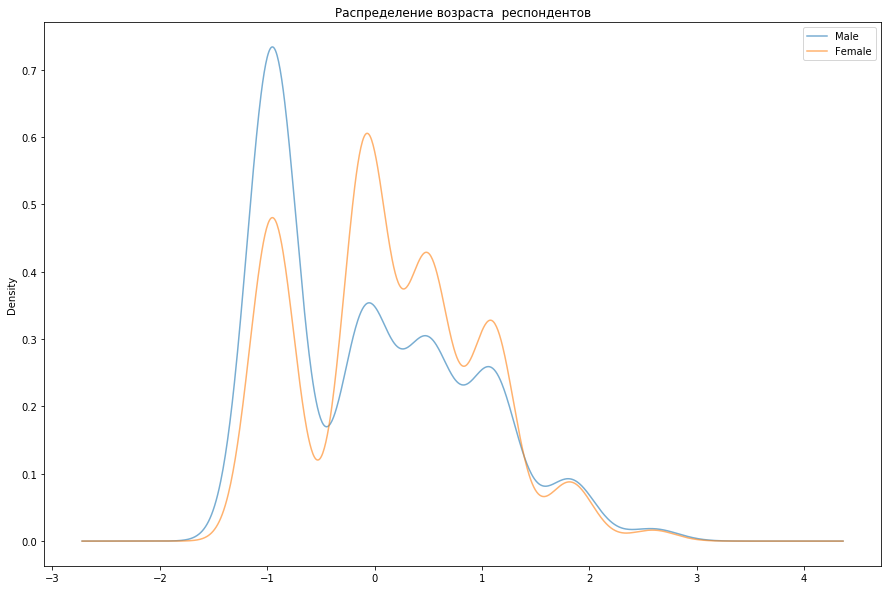

In [21]:
plt.figure(figsize=(15, 10))
data['Age'][data.Gender <= -0.48246].plot.kde( alpha=0.6, label="Male")
data['Age'][data.Gender >= 0.48246].plot.kde( alpha=0.6, label="Female")

plt.legend()
plt.title("Распределение возраста  респондентов");

Данный график наглядно показывает, что большинство мужчин в данном датасете находятся в возрасте от 18 до 24 лет. Тогда как девушек данного возраста также много, большинству из них от 25 до 34 лет.

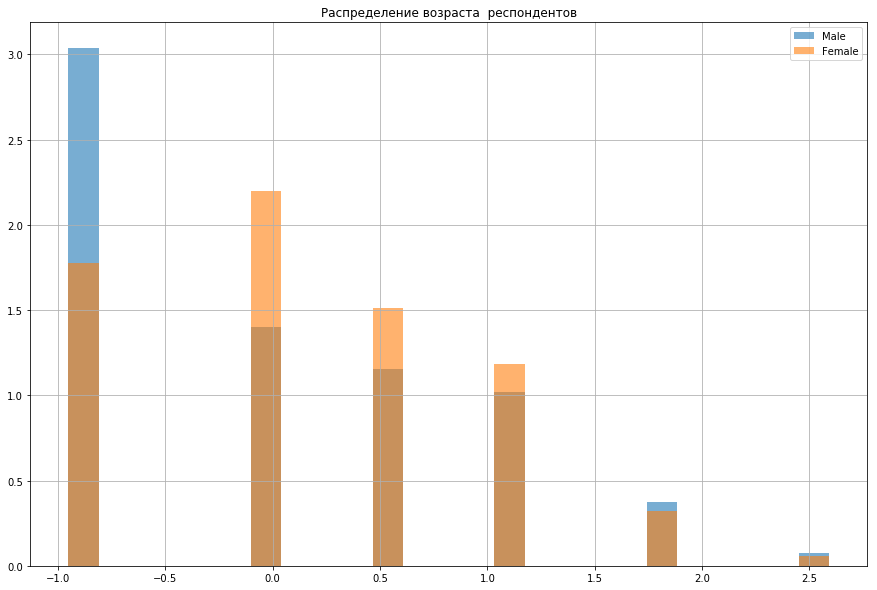

In [19]:
plt.figure(figsize=(15, 10))
data['Age'][data.Gender <= -0.48246].hist(bins=25, alpha=0.6, label="Male", normed=True)
data['Age'][data.Gender >= 0.48246].hist(bins=25, alpha=0.6, label="Female", normed=True)

plt.legend()
plt.title("Распределение возраста  респондентов");

7.Визуализация - диаграммы распределения потребления шоколада и кокаина.

### Комментарий к решению
Ух ты, ух ты, какие крутые визуализации!

Text(0.5,1,'Chocolate Consumption')

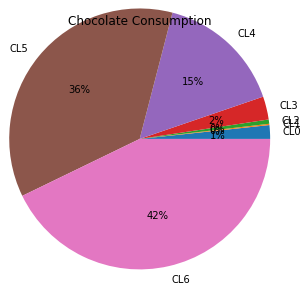

In [170]:
d = data.groupby(['Choc']).size()

plt.subplot(aspect=True)
plt.pie(d, labels=d.index.values, autopct='%i%%', radius = 1.5)
plt.title("Chocolate Consumption")


Text(0.5,1,'Coke Consumption')

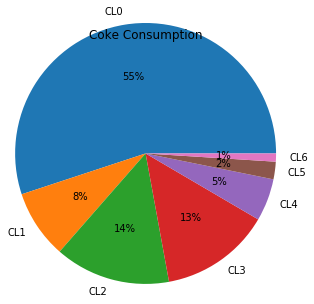

In [168]:
d = data.groupby(['Coke']).size()

plt.subplot(aspect=True)
plt.pie(d, labels=d.index.values, autopct='%i%%', radius = 1.5)
plt.title("Coke Consumption")

Данные диаграммы наглядно показывают, что люди потребляют гораздо меньше кокаина, чем шоколада, и что более половины опрошенных никогда не пробовали кокаин. И это хорошо!